合并 k 个排序链表，返回合并后的排序链表。请分析和描述算法的复杂度。

示例:

输入:
[
  1->4->5,
  1->3->4,
  2->6
]
输出: 1->1->2->3->4->4->5->6

In [1]:
#读取每个节点的值到一个list，对list排序，再合成一个链表
def mergeKLists(lists):
    list_ = []
    head = point = ListNode(0)
    for i in lists:
        while i:
            list_.append(i.val)
            i = i.next
    for x in sorted(list_):
        point.next = ListNode(x)
        point = point.next
    return head.next

In [3]:
from queue import PriorityQueue
#Approach 3: Optimize Approach 2 by Priority Queue
def mergeKLists(lists):
    head = point = ListNode(0)
    q = PriorityQueue()
    for index,l in enumerate(lists):
        if l:
            q.put((l.val,index,l))
    while not q.empty():
        val, node, list_idx = q.get()
        point.next = ListNode(val)
        point = point.next
        node = node.next
        if node:
            q.put((node.val, list_idx, node))
    return head.next

Approach 5: Merge with Divide And Conquer

Intuition & Algorithm

This approach walks alongside the one above but is improved a lot. We don't need to traverse most nodes many times repeatedly

- Pair up \text{k}k lists and merge each pair.

- After the first pairing, \text{k}k lists are merged into k/2k/2 lists with average 2N/k2N/k length, then k/4k/4, k/8k/8 and so on.

- Repeat this procedure until we get the final sorted linked list.

Thus, we'll traverse almost NN nodes per pairing and merging, and repeat this procedure about \log_{2}{k}log
​2
​​ k times.

Divide_and_Conquer

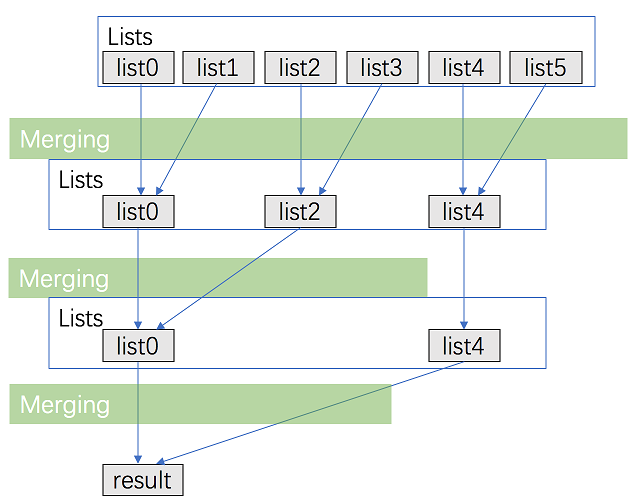

In [4]:
def mergeKLists(lists):
    amount = len(lists)
    interval = 1
    while interval < amount:
        for i in range(0, amount-interval, interval*2):
            lists[i] = merge2Lists(lists[i], lists[i + interval])
        interval *= 2
def merge2Lists(l1, l2):
    head = point = ListNode(0)
    while l1 and l2:
        if l1.val <= l2.val:
            point.next = l1
            l1 = l1.next
        else:
            point.next = l2
            l2 = l1
            l1 = point.next.next
    if not l1:
        point.next = l2
    else:
        point.next = l1
    return head.next